<a href="https://colab.research.google.com/github/FrkAk/Deep_Learning_Workshop/blob/master/Workshop/Default_Payment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

# Define Methods

In [109]:
def read_dataset(names):
  data = pd.read_csv("dataset.csv",
                  skiprows=1,
                  names=names)
  data.head()
  return data
  
def get_dimension(names):
  return len(names)


## Split the Dataset

In [110]:
def split(data,test_size):
  from sklearn.model_selection import train_test_split
  train, test = train_test_split(data, test_size=test_size)
  # self.train.head()
  return train,test

### Extract Labels

In [111]:
def extract_features(data,label_name='default.payment.next.month'):
  features = data.copy()
  labels = data.pop(label_name)
  return features,labels

### Convert to NumPy array

In [112]:
def convert_features_frame_to_numpy(frame):
    features = np.array(frame)
    return features

## Model Structure

In [113]:
def create_model(dim):
  model = tf.keras.Sequential([
    layers.Conv1D(filters=128, kernel_size=3,
                  strides=1,
                  activation="relu",
                  padding='causal',
                  input_shape=[dim, 1]),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    # layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dense(1,activation='sigmoid')
  ])
  model.summary()
  return model

In [114]:
def get_model_weights(model):
  return model.get_weights()

## Tune the Learning Rate

It is needed to pick an optimal learning rate.

In [115]:
def tune_learning_rate(model,features,labels):
  # Set the learning rate scheduler
  lr_schedule = tf.keras.callbacks.LearningRateScheduler(
      lambda epoch: 1e-8 * 10**(epoch / 20))

  # Initialize the optimizer
  optimizer = tf.keras.optimizers.Adam()

  # Set the training parameters
  model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                    optimizer = optimizer,metrics=['accuracy'])

  # Train the model
  history = model.fit(features,labels, epochs=100, callbacks=[lr_schedule])
  return history

In [116]:
def plot_learning_rate(history):
  # Define the learning rate array
  lrs = 1e-8 * (10 ** (np.arange(100) / 20))

  # Set the figure size
  plt.figure(figsize=(10, 6))

  # Set the grid
  plt.grid(True)

  # Plot the loss in log scale
  plt.semilogx(lrs, history.history["loss"])

  # Increase the tickmarks size
  plt.tick_params('both', length=10, width=1, which='both')

  # Set the plot boundaries
  plt.axis([1e-8, 1e-3, 0, 10])

## Train the model

In [117]:
def model_compile(model,init_weights,learning_rate=8e-5):
  # Reset states generated by Keras
  tf.keras.backend.clear_session()

  # Reset the weights
  model.set_weights(init_weights)

  model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
                metrics=['accuracy'])
  return model

In [184]:
def train_model(model,features,labels):
  history = model.fit(features, labels, 
                      validation_split=0.2,
                      shuffle = True,
                      epochs=10,)
  return history


In [140]:
def test_model(model,features, labels):
  result = model.evaluate(features, labels)
  return result

In [120]:
def plot_history(history):
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

# MAIN

In [179]:
names_all=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_demographic=["LIMIT_BAL","AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_SEX=["LIMIT_BAL", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_EDU=["LIMIT_BAL",	"SEX",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_MAR=["LIMIT_BAL",	"SEX", "EDUCATION",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_PAY=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_BILL=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_PAY_AMNT=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           
           "default.payment.next.month"]

names_non_PAY_ALL=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE",	"AGE",
           
           "BILL_AMT1",	"BILL_AMT2",	"BILL_AMT3",	"BILL_AMT4",	"BILL_AMT5",	"BILL_AMT6",
           
           "default.payment.next.month"]

names_non_BILL_PAY_AMNT=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE","AGE",
           "PAY_0",	"PAY_2",	"PAY_3",	"PAY_4"	,"PAY_5",	"PAY_6",
           
           "default.payment.next.month"]

names_non_PAY_BILL=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE","AGE",
           
           "PAY_AMT1",	"PAY_AMT2",	"PAY_AMT3",	"PAY_AMT4",	"PAY_AMT5",	"PAY_AMT6",
           "default.payment.next.month"]

names_non_PAY_BILL_PAY_AMNT=["LIMIT_BAL",	"SEX", "EDUCATION",	"MARRIAGE", "AGE",
           
           "default.payment.next.month"]

names_only_DEMOGRAPH=["SEX", "EDUCATION","MARRIAGE",	"AGE",
           
           "default.payment.next.month"]


In [126]:
def build_network(data_names,tune=False):
  data = read_dataset(data_names)
  dim = get_dimension(data_names)
  train, test = split(data,test_size=0.2)
  train_features, train_labels = extract_features(train,label_name='default.payment.next.month')
  test_features, test_labels = extract_features(test,label_name='default.payment.next.month')
  
  train_features = convert_features_frame_to_numpy(train_features)
  test_features = convert_features_frame_to_numpy(test_features)

  model = create_model(dim)
  init_weights = get_model_weights(model)

  if tune:
    tune_history = tune_learning_rate(model,train_features,train_labels)
    plot_learning_rate(tune_history)
  
  model = model_compile(model,init_weights,learning_rate=8e-5)
  
  history = train_model(model,train_features,train_labels)

  plot_history(history)

  result = test_model(model,test_features, test_labels)

  return history, result



## Training

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 128)           512       
                                                                 
 dense (Dense)               (None, 24, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 24, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 24, 16)            1040      
                                                                 
 dense_3 (Dense)             (None, 24, 1)             17        
                                                                 
Total params: 26,337
Trainable params: 26,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] 

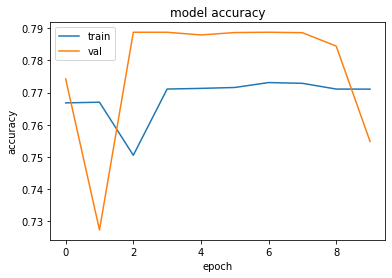

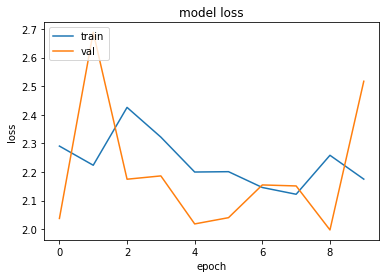

188/188 [==============================] - 6s 33ms/step - loss: 2.5801 - accuracy: 0.7452


In [185]:
all_features_history, all_features_result = build_network(names_all,tune=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 21, 128)           512       
                                                                 
 dense (Dense)               (None, 21, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 21, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 21, 16)            1040      
                                                                 
 dense_3 (Dense)             (None, 21, 1)             17        
                                                                 
Total params: 26,337
Trainable params: 26,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] 

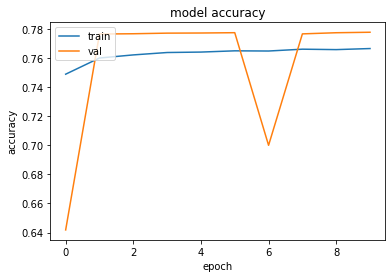

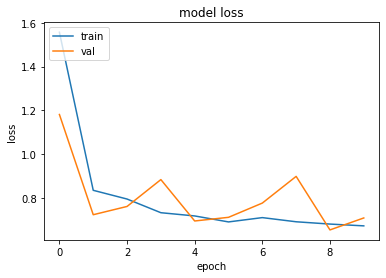

188/188 [==============================] - 5s 25ms/step - loss: 0.7008 - accuracy: 0.7794


In [186]:
non_demographic_features_history, non_demographic_features_result = build_network(names_non_demographic,tune=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 128)           512       
                                                                 
 dense (Dense)               (None, 23, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 23, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 23, 16)            1040      
                                                                 
 dense_3 (Dense)             (None, 23, 1)             17        
                                                                 
Total params: 26,337
Trainable params: 26,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] 

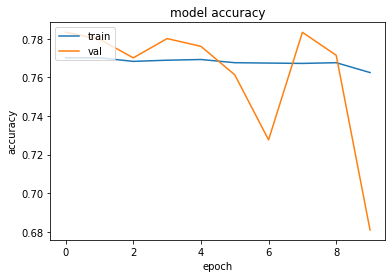

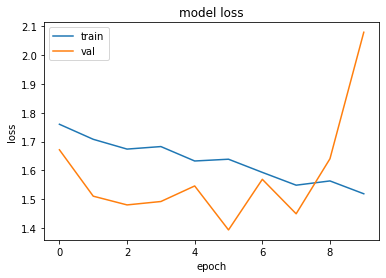

188/188 [==============================] - 2s 10ms/step - loss: 2.1368 - accuracy: 0.6785


In [187]:
non_SEX_features_history, non_SEX_features_result = build_network(names_non_SEX,tune=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 128)           512       
                                                                 
 dense (Dense)               (None, 23, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 23, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 23, 16)            1040      
                                                                 
 dense_3 (Dense)             (None, 23, 1)             17        
                                                                 
Total params: 26,337
Trainable params: 26,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] 

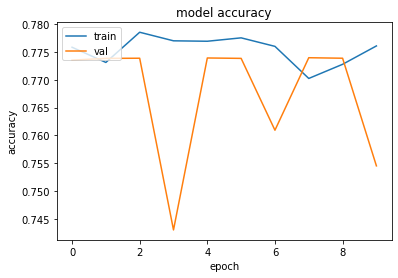

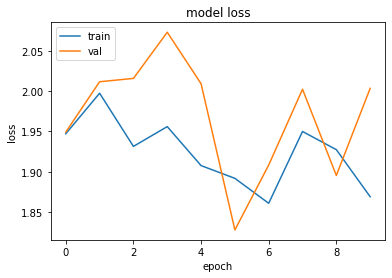

188/188 [==============================] - 3s 16ms/step - loss: 1.9598 - accuracy: 0.7587


In [188]:
non_EDU_features_history, non_EDU_features_result = build_network(names_non_EDU,tune=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 128)           512       
                                                                 
 dense (Dense)               (None, 23, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 23, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 23, 16)            1040      
                                                                 
 dense_3 (Dense)             (None, 23, 1)             17        
                                                                 
Total params: 26,337
Trainable params: 26,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] 

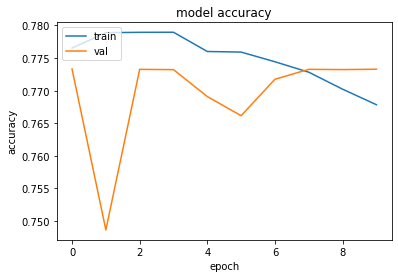

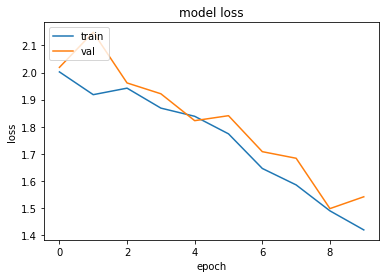

188/188 [==============================] - 10s 51ms/step - loss: 1.5138 - accuracy: 0.7758


In [189]:
non_MAR_features_history, non_MAR_features_result = build_network(names_non_MAR,tune=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 128)           512       
                                                                 
 dense (Dense)               (None, 18, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 18, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 18, 16)            1040      
                                                                 
 dense_3 (Dense)             (None, 18, 1)             17        
                                                                 
Total params: 26,337
Trainable params: 26,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] 

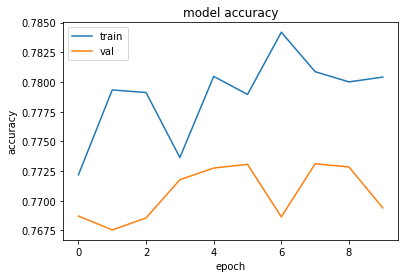

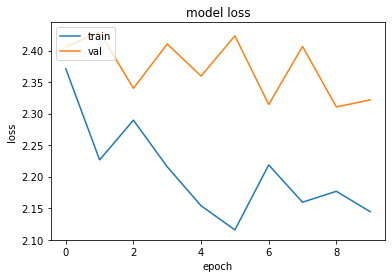

188/188 [==============================] - 6s 30ms/step - loss: 2.2578 - accuracy: 0.7750


In [190]:
non_PAY_features_history, non_PAY_features_result = build_network(names_non_PAY,tune=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 128)           512       
                                                                 
 dense (Dense)               (None, 18, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 18, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 18, 16)            1040      
                                                                 
 dense_3 (Dense)             (None, 18, 1)             17        
                                                                 
Total params: 26,337
Trainable params: 26,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] 

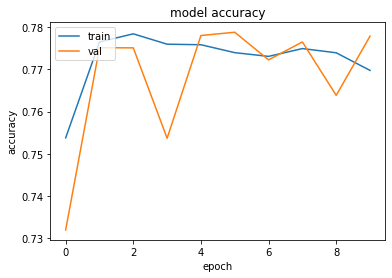

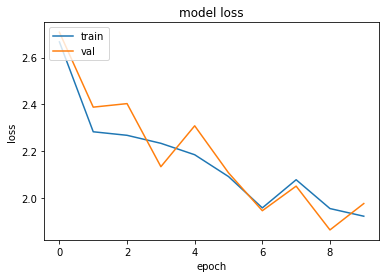

188/188 [==============================] - 10s 50ms/step - loss: 1.9624 - accuracy: 0.7791


In [191]:
non_BILL_features_history, non_BILL_features_result = build_network(names_non_BILL,tune=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 18, 128)           512       
                                                                 
 dense (Dense)               (None, 18, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 18, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 18, 16)            1040      
                                                                 
 dense_3 (Dense)             (None, 18, 1)             17        
                                                                 
Total params: 26,337
Trainable params: 26,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] 

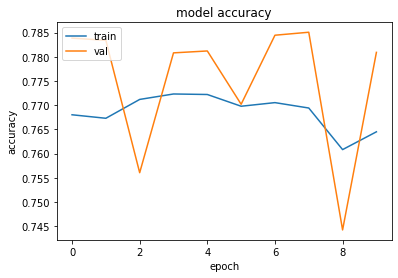

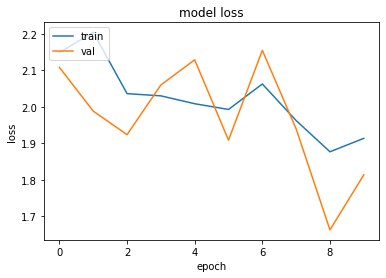

188/188 [==============================] - 3s 16ms/step - loss: 1.9246 - accuracy: 0.7724


In [192]:
non_PAY_AMNT_features_history, non_PAY_AMNT_features_result = build_network(names_non_PAY_AMNT,tune=False)

In [ ]:
non_PAY_ALL_features_history, non_PAY_ALL_features_result = build_network(names_non_PAY_ALL,tune=False)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 128)           512       
                                                                 
 dense (Dense)               (None, 12, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 12, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 12, 16)            1040      
                                                                 
 dense_3 (Dense)             (None, 12, 1)             17        
                                                                 
Total params: 26,337
Trainable params: 26,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
600/600 [==============================] 

In [ ]:
non_BILL_PAY_AMNT_features_history, non_BILL_PAY_AMNT_features_result = build_network(names_non_BILL_PAY_AMNT,tune=False)

In [ ]:
non_PAY_BILL_features_history, non_PAY_BILL_features_result = build_network(names_non_PAY_BILL,tune=False)

In [ ]:
non_PAY_BILL_PAY_AMNT_features_history, non_PAY_BILL_PAY_AMNT_features_result = build_network(names_non_PAY_BILL_PAY_AMNT,tune=False)

In [ ]:
only_DEMOGRAPH_features_history, only_DEMOGRAPH_features_result = build_network(names_only_DEMOGRAPH,tune=False)

# Result

In this deep learning task, there are five different data are tested. The aim was trying to investigate demographic features' effect on the prediction of default payment for the next month. The result shows us although some accuracy changes are occurring on a different dataset, there is no clear sign of the effect of demographic features changing the prediction since there is no significant accuracy difference. However, The difference increases when we do not count on education level or marital status. This can raise some questions and needs to investigate further to answer accurately. Example researches could be training the same network on different levels of education or marital status to see the exact effect. However, this needs lots of time, and this may be beyond this task since time is limited. To sum up, it can be said that the model acts almost fairly toward different people.

In [ ]:
from tabulate import tabulate
print(tabulate([['all_features', {}],
                ['non_demographic_features', {}], 
                ['non_SEX_features', {}],
                ['non_EDU_features', {}],
                ['non_MAR_features', {}],
                ['non_PAY_features', {}],
                ['non_BILL_features', {}],
                ['non_PAY_AMNT_features', {}],
                ['non_PAY_ALL_features', {}],
                ['non_BILL_PAY_AMNT_features', {}],
                ['non_PAY_BILL_features', {}],
                ['non_PAY_BILL_PAY_AMNT_features', {}],
                ['only_DEMOGRAPH_features', {}]], 
               headers=['Dataset Configuration','Result'],floatfmt=".2f").format(all_features_result[1]*100,
                                      non_demographic_features_result[1]*100,
                                      non_SEX_features_result[1]*100,
                                      non_EDU_features_result[1]*100,
                                      non_MAR_features_result[1]*100,
                                      non_PAY_features_result[1]*100,
                                      non_BILL_features_result[1]*100,
                                      non_PAY_AMNT_features_result[1]*100,
                                      non_PAY_ALL_features_result[1]*100,
                                      non_BILL_PAY_AMNT_features_result[1]*100,
                                      non_PAY_BILL_features_result[1]*100,
                                      non_PAY_BILL_PAY_AMNT_features_result[1]*100,
                                      only_DEMOGRAPH_features_result[1]*100))